# 1. 퍼셉트론

퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다.  
퍼셉트론의 신호는 0과 1 두 가지 값을 가질 수 있다. 

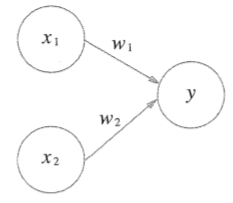

In [29]:
Image('../images/simple1.png')

위 그림은 입력으로 2개의 신호를 받은 퍼셉트론의 예이다. x1, x2는 입력신호, y는 출력신호, w1, w2는 가중치를 뜻한다. 

입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지게 되는데,  
뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다. (이를 '뉴런을 활성화한다')라고 표현하기도 한다. 

가중치는 전류에서 말하는 저항에 해당한다.   
저항은 전류의 흐름을 억제하는 매개변수로, 저항이 낮을수록 큰 전류가 흐른다.  
한편 퍼셉트론의 가중치는 그 값이 클수록 강한 신호를 흘려보낸다. 

## 1.1 퍼셉트론 구현하기 

논리 회로를 간단한 파이썬으로 구현해보자.

In [10]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta :
        return 0
    else :
        return 1

In [12]:
AND(0,0) # 0
AND(0,1) # 0
AND(1,0) # 0
AND(1,1) # 1

1

## 1.2 가중치와 편향 도입하기

In [13]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7

In [14]:
w * x

array([0. , 0.5])

In [15]:
np.sum(w*x)

0.5

In [16]:
np.sum(w*x) + b

-0.19999999999999996

## 1.3 가중치와 편향 구현하기

In [17]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0 :
        return 0
    else :
        return 1

편향이라는 용어는 '한쪽으로 치우쳐 균형을 깬다'라는 의미를 담고 있다. 실제로 두 입력이 모두 0이어도 결과로 편향 값을 출력한다. 

이어서 NAND 게이트와 OR 게이트를 구현해보자.

In [18]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    if tmp <= 0 :
        return 0
    else :
        return 1


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    if tmp <= 0 :
        return 0
    else :
        return 1

## 1.4 퍼셉트론의 한계

XOR 게이트는 배타적 논리합이라는 논리 회로인데 지금까지 본 퍼셉트론으로는 이 XOR 게이트를 구현할 수 없다. 
직선 하나로 나누는 방법은 아무리 생각해도 떠오르지 않는다. 

# 2. 다층 퍼셉트론

퍼셉트론은 '층을 쌓아' 다층 퍼셉트론을 만들 수 있다는 사실에 있다.  
이번에는 층을 하나 더 쌓아서 XOR를 표현해볼 것이다. 

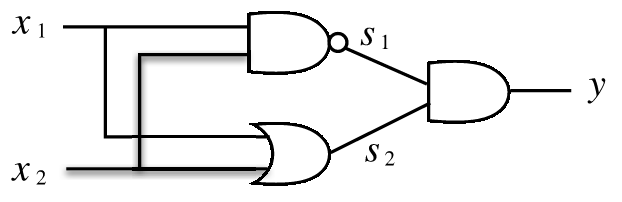

In [19]:
Image('../images/multi1.png')

x1, x2가 입력신호, y는 출력신호이다.  
x1, x2는 NAND와 OR 게이트의 입력이 되고, NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다. 

## 2.1 XOR 게이트 구현하기

In [20]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [24]:
XOR(0,0) # 0
XOR(0,1) # 1
XOR(1,0) # 1
XOR(1,1) # 0

0

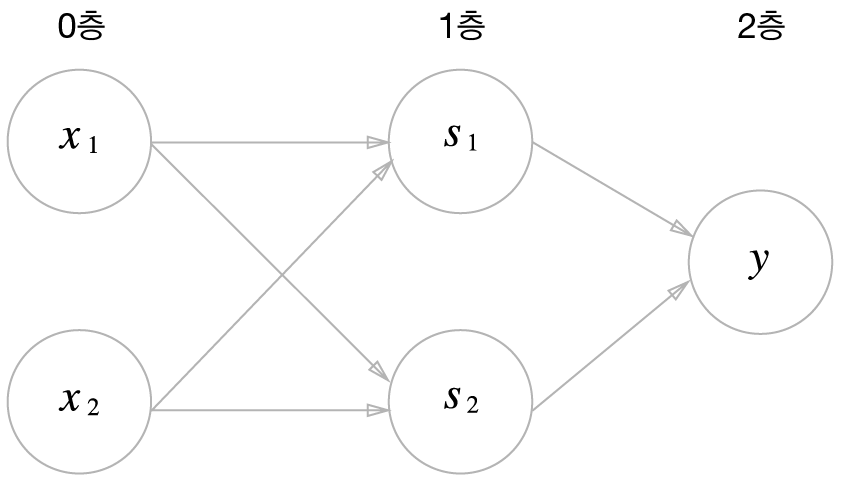

In [25]:
Image('../images/multi2.png')

0층에서 1층으로 신호가 전달되고, 1층에서 2층으로 신호가 전달된다. 

단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현할 수 있다. 

## 2.2 정리

+ 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다. 
+ 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
+ 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다. 
+ XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다. 
+ 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다. 
+ 단층 퍼셉트론은 직선형 영역에만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다. 
+ 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다. 